In [ ]:
%load_ext jupyter_record
%set_filename Flight_Delay_Prediction.ipynb
%autosave 60
# do not change your notebook name
# do not touch this cell

# Section 0: Set-up

Before starting this assignment, make sure that you have completed the set-up instuctions found here: https://docs.google.com/document/d/1i-fHZ54avLNDIVcVqAdYgKISXJUtC2QL8oR5i1XDMwU/edit?usp=sharing

**Important:** Please complete the final step of the set-up instructions and confirm that you code_history folder contains
"Flight_Delay_Prediction_current_index.txt" and "Flight_Delay_Prediction_log_0.txt. "
**Important:** Make sure to document any LLM usage in this notebook.

In [3]:
print("Hello World") # run before starting the assignment. Make sure that this line occurs in the "Flight_Delay_Prediction_log_0.txt" file.


Hello World


# Section 1: ChatGPT and Other Large Language Models

You are allowed to use ChatGPT and other similar LLM code assistant tools. Note that you do not **HAVE TO** use such tools. However, we ask you to document how you use these tools in this section and your code.

Please Respond with Yes or No: Did you use generative AI tools for this assignment?

**Replace with Response**


## List of Prompts

Please keep track of all the prompts you used in this section. Please include all parts of multi-prompt questions, as well as any prompts whose outputs you didn't end up using. You should add the prompt you used to the list below:

1. E.G. Create code that prints out "hello world" in Python.
2. **Insert Prompt Here**

## Prompts for Generated Code
In a comment before any code, please also include a note if you used generative AI for the following lines of code. Specifically, please add a comment with the word "GENERATED" all in caps. If relevative, included the number for the relative corresponding prompt from the previous section in brackets.

E.G.

In [4]:
# GENERATED (1)

print("Hello World")

Hello World


# Section 2: Data Preprocessing

In this section, you should load your raw training dataset, and create your features for the model. You can find the data here: [shorturl.at/owMPS](https://shorturl.at/owMPS)

**IMPORTANT**: Your data is in "data" folder within this repository. You can use pandas to import your data from the csv files. Any new files you create should to be in the "data" repository.

The data files are as following:

- training.csv: Seen/training data. Contains raw features and prediction class ('DepDel15').
- testing_X.csv: Unseen/testing data. Contains only raw features, and no prediction class. 
- readme.html: Information about the features. 



In [5]:
# Load training data
import pandas as pd
data = pd.read_csv('./data/training.csv')
data.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,CRSElapsedTime,Distance,...,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,CRSArrTime
0,0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,...,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,1304
1,1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,...,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,1304
2,2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,...,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,1304
3,3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,...,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,1304
4,4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,60.0,145.0,...,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,1500


In [6]:
data.columns.values

array(['Unnamed: 0', 'FlightDate', 'Airline', 'Origin', 'Dest',
       'Cancelled', 'Diverted', 'CRSDepTime', 'CRSElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network',
       'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Operating_Airline', 'DOT_ID_Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'DepDel15', 'CRSArrTime'], dtype=object)

Looking at these columns, a lot of them seem irrelevant to a flight's delay. Also, some of them seem redundant: e.g. the departure airport already determines the departure city and state. It is probably best that we don't use redundant columns.

In [7]:
data.isna().sum()

Unnamed: 0                                     0
FlightDate                                     0
Airline                                        0
Origin                                         0
Dest                                           0
Cancelled                                      0
Diverted                                       0
CRSDepTime                                     0
CRSElapsedTime                                 6
Distance                                       0
Year                                           0
Quarter                                        0
Month                                          0
DayofMonth                                     0
DayOfWeek                                      0
Marketing_Airline_Network                      0
Operated_or_Branded_Code_Share_Partners        0
DOT_ID_Marketing_Airline                       0
IATA_Code_Marketing_Airline                    0
Operating_Airline                              0
DOT_ID_Operating_Air

The columns with NA values are Tail_Number and DepDel15. I will not use Tail_Number in building my model so that column can be removed.

In [8]:
data[(data['Cancelled'] == True)]['DepDel15'].value_counts(dropna=False)

NaN    85462
1.0     1522
0.0     1389
Name: DepDel15, dtype: int64

Most of these missing values are because the flight was cancelled. Notice that while most cancelled flights are NA, there are still valid values of DepDel15 for cancelled flights, and they appear pretty evenly split between 1 and 0. A flight can be delayed and then cancelled, or cancelled without being previously delayed, so cancelled flights should not be NA if data is clean.

In [9]:
data[(data['DepDel15'].isna()) & (data['Cancelled'] == False)]['Airline'].value_counts()

Endeavor Air Inc.         1109
Frontier Airlines Inc.       4
Name: Airline, dtype: int64

The other NA values seem to come from two specific airlines: Endeavor and Frontier (mostly Endeavor). There doesn't seem to be a clear indicator as to whether these values should be 0 or 1, and I don't want to train the model on incorrect data, so I think the model will be better if we remove these values, which represent about 1.5% of the total data.

In [10]:
data_clean = data[~data['DepDel15'].isna()]
len(data_clean)

5602937

In [11]:
data_clean['DepDel15'].value_counts(dropna=False)

0.0    4550887
1.0    1052050
Name: DepDel15, dtype: int64

Let's examine arrival and departure hour to see if they are correlated with delays.

In [12]:
data_clean['CRSDepTimeHour'] = data_clean['CRSDepTime']//100
data_clean['CRSArrTimeHour'] = data_clean['CRSArrTime']//100
data_clean.head()

C:\Users\bkbro\AppData\Local\Temp\ipykernel_14300\2924734651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['CRSDepTimeHour'] = data_clean['CRSDepTime']//100
C:\Users\bkbro\AppData\Local\Temp\ipykernel_14300\2924734651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['CRSArrTimeHour'] = data_clean['CRSArrTime']//100


,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,CRSElapsedTime,Distance,...,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,CRSArrTime,CRSDepTimeHour,CRSArrTimeHour
0,0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,...,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,1304,12,13
1,1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,...,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,1304,12,13
2,2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,...,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,1304,12,13
3,3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,...,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,1304,12,13
4,4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,60.0,145.0,...,30397,"Atlanta, GA",GA,13,Georgia,34,0.0,1500,14,15


<Axes: xlabel='CRSDepTimeHour'>

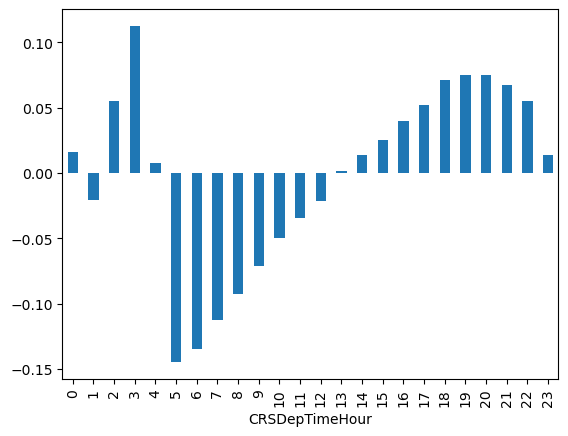

In [13]:
# Plot average delay times by column value
def investigate(col, df = data_clean, numerical = False):
    grp = df.groupby(col)['DepDel15'].mean()
    baseline = grp.mean()
    if numerical:
        return (grp - baseline).plot.line()
    return (grp - baseline).plot.bar()
investigate('CRSDepTimeHour')

<Axes: ylabel='Frequency'>

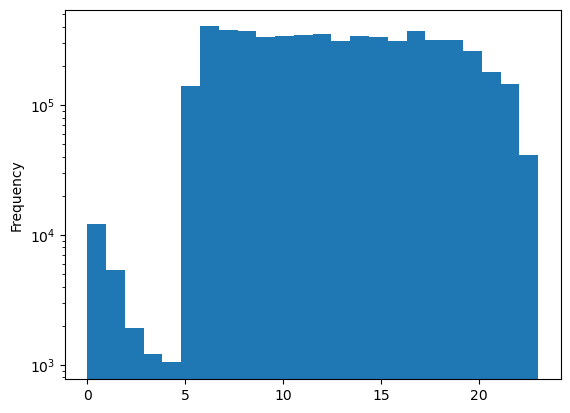

In [14]:
data_clean['CRSDepTimeHour'].plot.hist(bins=24, log=True)

C:\Users\bkbro\AppData\Local\Temp\ipykernel_14300\353534210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['CRSElapsedTimeHour'] = data_clean['CRSElapsedTime']//60


<Axes: xlabel='CRSElapsedTimeHour'>

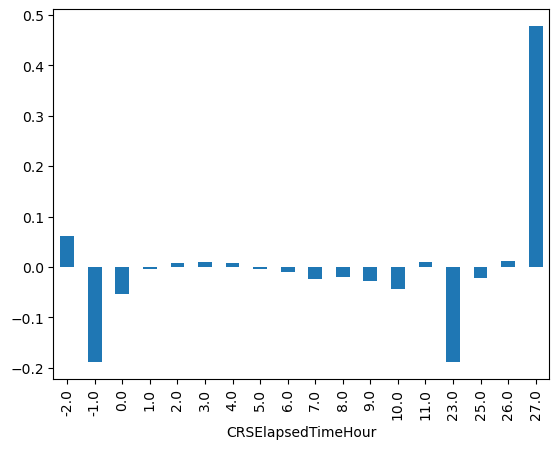

In [15]:
data_clean['CRSElapsedTimeHour'] = data_clean['CRSElapsedTime']//60

investigate('CRSElapsedTimeHour')

There seems to be some nonsensical data in this column (i.e. flights lasting longer than 24 hours or negative hours) so I will not use this column. Next I will investigate month and day of week. I think that day of month will be redundant if I include these two features.

<Axes: xlabel='Month'>

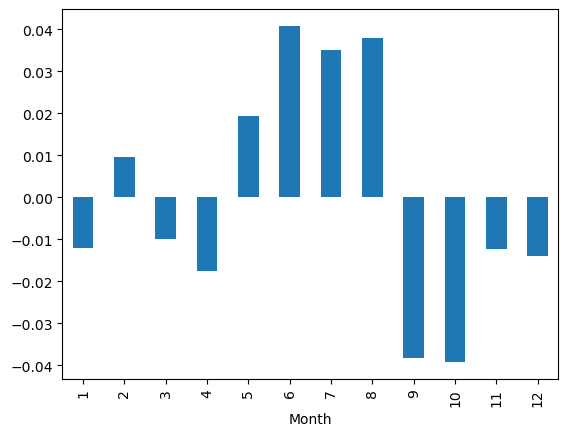

In [16]:
investigate('Month')

<Axes: xlabel='DayOfWeek'>

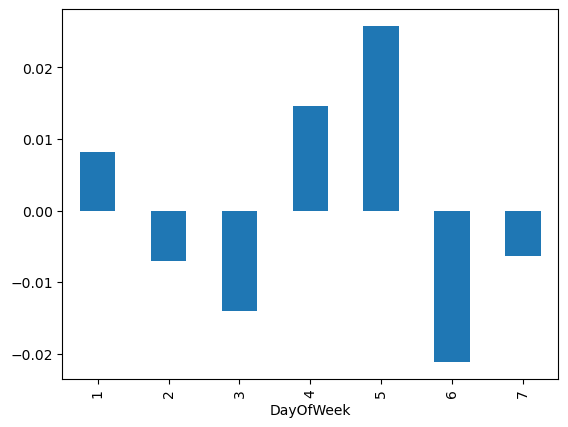

In [17]:
investigate('DayOfWeek')

The month and day of week look like they have a trend, with higher values in the middle and lower ones on the sides. A linear model may not be very good at fitting this data. I also want to look and see if days with more flights tended to have more delays.

In [18]:
data_clean2 = data_clean.copy()
# Create a column for the number of flights on that given day
flights_per_day = data_clean2.groupby(['Month', 'DayofMonth'])[['Year']].count().reset_index()
flights_per_day = flights_per_day.rename(columns = {'Year': 'FlightsPerDay'})
# This data frame does not have data for Feb. 29, we will set its value equal to Feb. 28 just in case
feb28_flights = flights_per_day.at[58, 'FlightsPerDay']
flights_per_day = pd.concat([flights_per_day, 
                             pd.DataFrame({'Month': [2], 'DayofMonth': [29], 'FlightsPerDay': [feb28_flights]})],
                            ignore_index = True)

data_clean2 = data_clean2.merge(flights_per_day, on = ['Month', 'DayofMonth'])

<Axes: xlabel='Flights1000'>

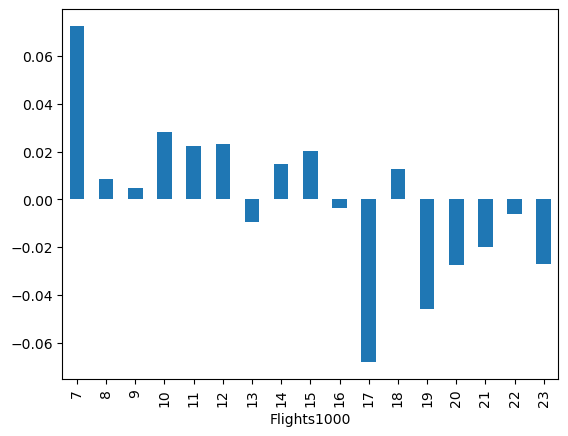

In [19]:
data_clean2['Flights1000'] = data_clean2['FlightsPerDay']//1000
investigate('Flights1000', df = data_clean2)

There seems to be a downward trend between number of flights when in groups of 1000. Additionally, I will make a feature that is the delay rate of each day of the year. However, to avoid an information leak I need to make this variable after doing train-test split so the rates are only calculated using training data.

I also wanted to make a variable that has each airport's rate of delayed flights, for origin and departure airports. I could not use this feature because there are airports in the final test data that are not in the training data.

In [20]:
# The following code does not work because our test data has airports that do not exist in 
# the training data
# Compute origin delay rates
# origin_delay_rates = data_clean.groupby('Origin')[['DepDel15']].mean().reset_index()
# origin_delay_rates = origin_delay_rates.rename(columns = {'DepDel15': 'OriginDelayRate'})
# data_clean = data_clean.merge(origin_delay_rates, on = 'Origin')

# Compute destination delay rates
#dest_delay_rates = data_clean.groupby('Dest')[['DepDel15']].mean().reset_index()
# dest_delay_rates = dest_delay_rates.rename(columns = {'DepDel15': 'DestDelayRate'})
# data_clean = data_clean.merge(dest_delay_rates, on = 'Dest')
data_clean2.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,CRSElapsedTime,Distance,...,DestStateFips,DestStateName,DestWac,DepDel15,CRSArrTime,CRSDepTimeHour,CRSArrTimeHour,CRSElapsedTimeHour,FlightsPerDay,Flights1000
0,0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,62.0,145.0,...,13,Georgia,34,0.0,1304,12,13,1.0,14595,14
1,29,2018-01-23,Endeavor Air Inc.,ATL,ABY,False,False,1037,60.0,145.0,...,13,Georgia,34,0.0,1137,10,11,1.0,14595,14
2,58,2018-01-23,Endeavor Air Inc.,ATL,EVV,False,False,939,89.0,350.0,...,18,Indiana,42,0.0,1008,9,10,1.0,14595,14
3,86,2018-01-23,Endeavor Air Inc.,BTV,DTW,False,False,1240,135.0,537.0,...,26,Michigan,43,0.0,1455,12,14,2.0,14595,14
4,143,2018-01-23,Endeavor Air Inc.,EWN,ATL,False,False,1415,110.0,433.0,...,13,Georgia,34,0.0,1605,14,16,1.0,14595,14


# Section 3: Model Prediction

In this section, you should import relevant modeling/scikit-learn libraries and create a prediction model from your features. You should carefuly evaluate how your model performs based on the data you already have.

**Hint**: We are using a real world dataset with low correlation between the raw features and prediction class. You may have to carefully think about how to hand-engineer features from the raw features to capture correlation using a machine learning model.


**Hint 2**: When the instructors ran this assignment, we achieved an accuracy of 0.74 and AUC score of 0.54 on held out data. We do not expect high accuracy for this task, but your goal is to create a prediction model that is better than the simplest baseline - i.e. a model that predictions the majority class for all samples.


In [34]:
features = ['CRSArrTime', 'CRSDepTime', 'FlightsPerDay', 'DayOfWeek']

eval_data = data_clean2[features + ['Month', 'DayofMonth', 'FlightDate', 'DepDel15']]
#y = data_clean2['DepDel15']

In order to make my daily delay average feature, I had to use a non-standard workflow that does the train-test split, then creates the feature, then creates the feature matrix and class vector.

In [35]:
from sklearn.model_selection import train_test_split
# Stratify by flight date to preserve ratios of flight date
# We want a good balance of flight dates in the training and test data
train_data, val_data = train_test_split(eval_data, stratify = eval_data['FlightDate'])

# add flight averages
day_delay_rates = train_data.groupby(['Month', 'DayofMonth'])[['DepDel15']].mean().reset_index()
day_delay_rates = day_delay_rates.rename(columns = {'DepDel15': 'DayDelayRate'})

train_data = train_data.merge(day_delay_rates, on = ['Month', 'DayofMonth'])
val_data = val_data.merge(day_delay_rates, on = ['Month', 'DayofMonth'])
# remove columns we will not use to fit the model
X_train = train_data[features + ['DayDelayRate']].to_numpy()
y_train = train_data['DepDel15'].to_numpy()
X_val= val_data[features + ['DayDelayRate']].to_numpy()
y_val= val_data['DepDel15'].to_numpy()

In [23]:
from sklearn.metrics import classification_report
import numpy as np
ypred = np.zeros(y_val.shape) #always predict no delay
print(classification_report(y_val, ypred, zero_division = 0))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90   1138053
         1.0       0.00      0.00      0.00    262682

    accuracy                           0.81   1400735
   macro avg       0.41      0.50      0.45   1400735
weighted avg       0.66      0.81      0.73   1400735



In [38]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(class_weight = 'balanced')
# X_train = std.fit_transform(X_train)
model.fit(X_train, y_train)
ypred = model.predict(X_val)
print(classification_report(y_val, ypred))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82   1137613
         1.0       0.26      0.29      0.27    263122

    accuracy                           0.71   1400735
   macro avg       0.54      0.55      0.55   1400735
weighted avg       0.72      0.71      0.72   1400735



# Section 4: Final Evaluation

In this section, you should use your prediction model on held out data. For each sample in 'testing_X.csv', generate a binary prediction on whether the flight will be delayed by 15min or more.

**Important**: Create a csv file named that is a list of your predictions. It should be named './data/[CNET_ID]_final_assignment.csv' file, and contain only one row and columns equal to the sample size. 

**IMPORTANT**: Make sure that you create the new file in the "data" folder and with that file name. You may run into errors if you place it anywhere else. 


Note that you do not have true classification labels on this dataset.


In [27]:
# Load data
test = pd.read_csv('./data/testing_X.csv')
test.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,CRSElapsedTime,Distance,...,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSArrTime
0,0,2019-04-01,Envoy Air,LIT,ORD,False,False,1212,113.0,552.0,...,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,1405
1,1,2019-04-02,Envoy Air,LIT,ORD,False,False,1212,113.0,552.0,...,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,1405
2,2,2019-04-03,Envoy Air,LIT,ORD,False,False,1212,113.0,552.0,...,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,1405
3,3,2019-04-04,Envoy Air,LIT,ORD,False,False,1212,113.0,552.0,...,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,1405
4,4,2019-04-05,Envoy Air,LIT,ORD,False,False,1212,113.0,552.0,...,71,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,1405


In [39]:
# Create additional features
test2 = test.copy()
test2 = test2.merge(flights_per_day, on = ['Month', 'DayofMonth'], how = 'left')

day_delay_rates = data_clean2.groupby(['Month', 'DayofMonth'])[['DepDel15']].mean().reset_index()
day_delay_rates = day_delay_rates.rename(columns = {'DepDel15': 'DayDelayRate'})

data_clean2 = data_clean2.merge(day_delay_rates, on = ['Month', 'DayofMonth'])
test2 = test2.merge(day_delay_rates, on = ['Month', 'DayofMonth'])

In [40]:
# Re-fit model on whole training dataset for better accuracy
X_train2 = data_clean2[features + ['DayDelayRate']].to_numpy()
y_train2 = data_clean2['DepDel15'].to_numpy()

X_test = test2[features + ['DayDelayRate']].to_numpy()
#X_test = std.transform(X_test)
final_model = DecisionTreeClassifier(class_weight = 'balanced')
final_model.fit(X_train2, y_train2)

y_test_pred = final_model.predict(X_test)
y_test_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [47]:
# Write to file
y_test_pred.tofile('./data/12263164_final_assignment.csv', sep = ',')

# Section 5: Submission

After you completed this assignment, please zip [(Mac Instructions)](https://support.apple.com/guide/mac-help/zip-and-unzip-files-and-folders-on-mac-mchlp2528/mac#:~:text=Compress%20a%20file%20or%20folder,item%20with%20the%20.zip%20extension.) [(Windows Instructions)](https://support.microsoft.com/en-us/windows/zip-and-unzip-files-8d28fa72-f2f9-712f-67df-f80cf89fd4e5) the **entire ASSIGMENT-2023 folder** and upload it to your Google Drive. Please upload the link to this file on Canvas.